In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#قراءة الملفاتت
items = pd.read_csv('/content/olist_order_items_dataset.csv')
pay = pd.read_csv('/content/olist_order_payments_dataset.csv')
pro = pd.read_csv('/content/olist_products_dataset.csv')
order = pd.read_csv('/content/olist_orders_dataset.csv')
catname = pd.read_csv('/content/product_category_name_translation.csv')
# إيجاد القيم المشتركة بناءً على order_id
common_values = pd.merge(items, pay, on='order_id', how='inner')

# عرض القيم المشتركة
print(common_values)

# حفظ القيم المشتركة في ملف جديد (اختياري)
common_values.to_csv('common_values.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
117596  fffc94f6ce00a00581880bf54a75a037              1   
117597  fffcd46ef2263f404302a634eb57f7eb              1   
117598  fffce4705a9662cd70adb13d4a31832d              1   
117599  fffe18544ffabc95dfada21779c9644f              1   
117600  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

In [23]:
print("Missing values before cleaning:")
print(items.isnull().sum())
print(pay.isnull().sum())
print(pro.isnull().sum())
print(order.isnull().sum())
print(catname.isnull().sum())

# ملء القيم المفقودة أو إزالتها
items = items.dropna()  # حذف الصفوفة
pay = pay.fillna(0)      # ملء القيم المفقودة بالقيمة 0 في بيانات الدفع (يمكنك استخدام استراتيجيات أخرى)

order = order.dropna(subset=['order_id'])  # حذف الصفوف التي تحتوي على قيم مفقودة في order_id فقط

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing values before cleaning:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
p

In [24]:
print("\nDuplicated values before cleaning:")
print(items.duplicated().sum())
print(pay.duplicated().sum())
print(pro.duplicated().sum())
print(order.duplicated().sum())
print(catname.duplicated().sum())
items = items.drop_duplicates()
pay = pay.drop_duplicates()
pro = pro.drop_duplicates()
order = order.drop_duplicates()
catname = catname.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Duplicated values before cleaning:
0
0
0
0
0


In [25]:
print("\nDuplicated values after cleaning:")
print(items.duplicated().sum())
print(pay.duplicated().sum())
print(pro.duplicated().sum())
print(order.duplicated().sum())
print(catname.duplicated().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Duplicated values after cleaning:
0
0
0
0
0


In [26]:
file1 = set(pro['product_id'])
file2 = set(items['product_id'])

# إيجاد القيم المشتركة بين الملفين
common_product_ids = file1.intersection(file2)

# التحقق إذا كانت هناك قيم مشتركة
if common_product_ids:
    print("هناك قيم مشتركة بين 'product_id' في الملفين:")
    print(common_product_ids)
else:
    print("لا توجد قيم مشتركة بين 'product_id' في الملفين.")

هناك قيم مشتركة بين 'product_id' في الملفين:
{'8b3a9476f74f5297f7ff0ec6d95fe1ea', 'b91982b3afff5d274cf34ce54801a8e6', '35488a9242f4aa7f9f5c3580f1243512', 'b5285354b7300aa056db9c3b73e50cd0', '86573a992f10e1ad49a669fd151b7abf', '4135a8c6b588263879a627ed27a2a3c3', '12e6d0f655986ceff00c74658dec97b1', 'db99498f1d7048253b27cbb54916ec1d', 'c19d3d531fcbc095536275e1ecf643e4', '98d3d093647c91f5bd575773f6eab9e1', 'ea02a373dc65fa3648ef3bac7fb86e9c', '29bf158cd50fc035e7443f1c04e8deaa', '6feea907f9f949ce09d7d8ed626fd89a', '926ecae86335e45fea05e1e39e9a5be9', 'ee667ef9c46d1444ebde2f0ea9c6b4c3', '140a8324a66db81d299b24b30d93098e', '57fdf4c63141659fe6ba88cde482267b', '827be1443393caa95c4a035b2f4f74b5', 'cc28101310964f961bf1086fa0ffc922', 'a8f6902216234a2535986d89451f9ad7', 'db753afa921ad9943950ac46194a0031', '059fb7d4b3383690a65610a1d6320e7e', '6f4ed02e363461e27168f72bc33ffb80', '70b98d329c7a32c6aaa4f6e13a12ddf6', '35780c73ee3f0cda4f99733734a30cf6', '737d985cd93b0a4844c3c5847d945ca4', '8471182114c4e0e3b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


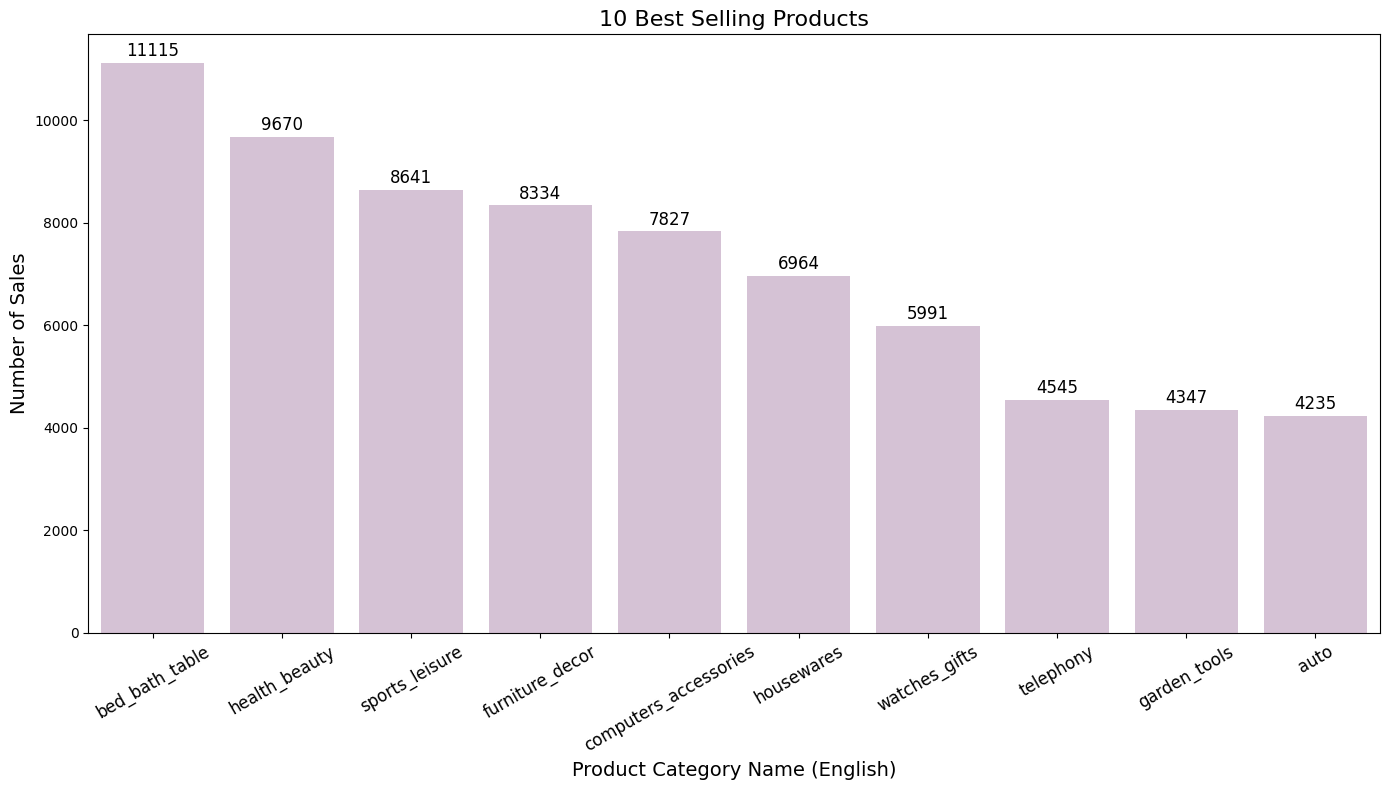

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the `items` and `pro` datasets
merged_data = pd.merge(items, pro[['product_id', 'product_category_name']], on='product_id', how='left')

# Merge with the catname dataset to get the English product names
merged_data = pd.merge(merged_data, catname[['product_category_name', 'product_category_name_english']],
                       on='product_category_name', how='left')

# Use the English product names for analysis
top_products = merged_data['product_category_name_english'].value_counts()[:10]

# Plotting
plt.figure(figsize=(14, 8))  # Increase the figure size for better visibility

# Use a purple color for the bars
sns.barplot(x=top_products.index, y=top_products.values, color='#D8BFD8')

# Set plot title and labels
plt.xticks(size=12, rotation=30, ha='center')  # Rotate labels slightly and center them
plt.title('10 Best Selling Products', fontsize=16)
plt.xlabel('Product Category Name (English)', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

# Add value labels on top of the bars
for i, value in enumerate(top_products.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=12)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The month with the highest sales in 2017 is: 12, with 7318 orders.


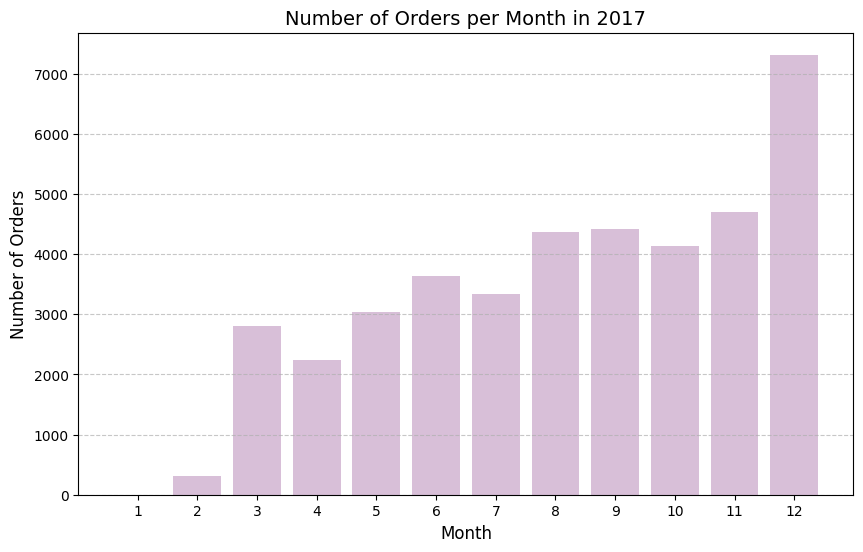

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# تحويل قيم العمود لتواريخ
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], errors='coerce')

# استخراج السنة والشهر من عمود التاريخ
order['Year'] = order['order_estimated_delivery_date'].dt.year
order['Month'] = order['order_estimated_delivery_date'].dt.month

# تصفية البيانات لتشمل فقط سنة 2017
data_2017 = order[order['Year'] == 2017]

# حساب عدد الطلبات لكل شهر في سنة 2017
monthly_sales = data_2017['Month'].value_counts().sort_index()

# الحصول على الشهر الذي حقق أكبر مبيعات
most_sales_month = monthly_sales.idxmax()
most_sales_value = monthly_sales.max()

print(f"The month with the highest sales in 2017 is: {most_sales_month}, with {most_sales_value} orders.")

# رسم البيانات باستخدام الرسم البياني العمودي
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='#D8BFD8')  # استخدام اللون البنفسجي الفاتح

# إضافة العناوين والتسميات
plt.title('Number of Orders per Month in 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(monthly_sales.index)  # عرض جميع الأشهر على المحور X

# عرض الرسم البياني
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The month with the highest sales in 2018 is: 8, with 9400 orders.


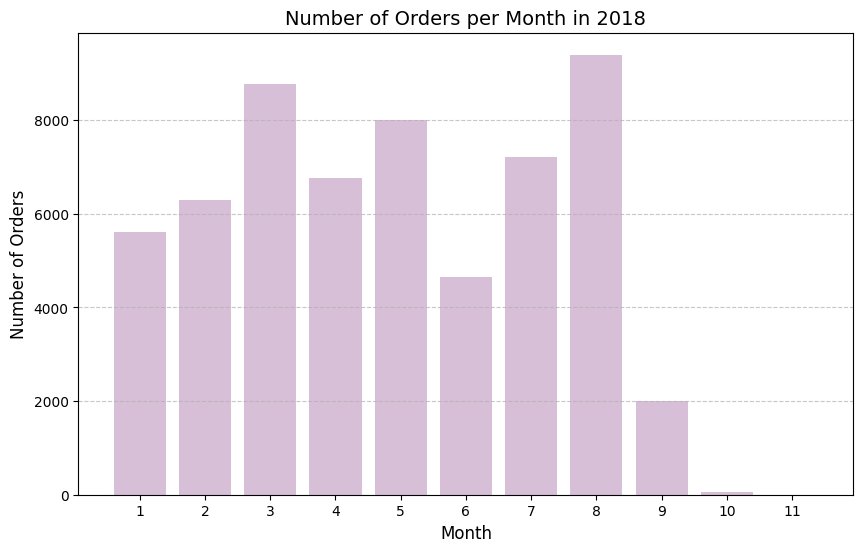

In [29]:
import pandas as pd



order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], errors='coerce')

# استخراج السنة والشهر من عمود التاريخ
order['Year'] = order['order_estimated_delivery_date'].dt.year
order['Month'] = order['order_estimated_delivery_date'].dt.month

# تصفية البيانات لتشمل فقط سنة 2017
data_2018 = order[order['Year'] == 2018]

# حساب عدد الطلبات لكل شهر في سنة 2017
monthly_sales = data_2018['Month'].value_counts().sort_index()

# الحصول على الشهر الذي حقق أكبر مبيعات
most_sales_month = monthly_sales.idxmax()
most_sales_value = monthly_sales.max()

print(f"The month with the highest sales in 2018 is: {most_sales_month}, with {most_sales_value} orders.")
# رسم البيانات باستخدام الرسم البياني العمودي
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='#D8BFD8')

# إضافة العناوين والتسميات
plt.title('Number of Orders per Month in 2018', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(monthly_sales.index)  # عرض جميع الأشهر على المحور X

# عرض الرسم البياني
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


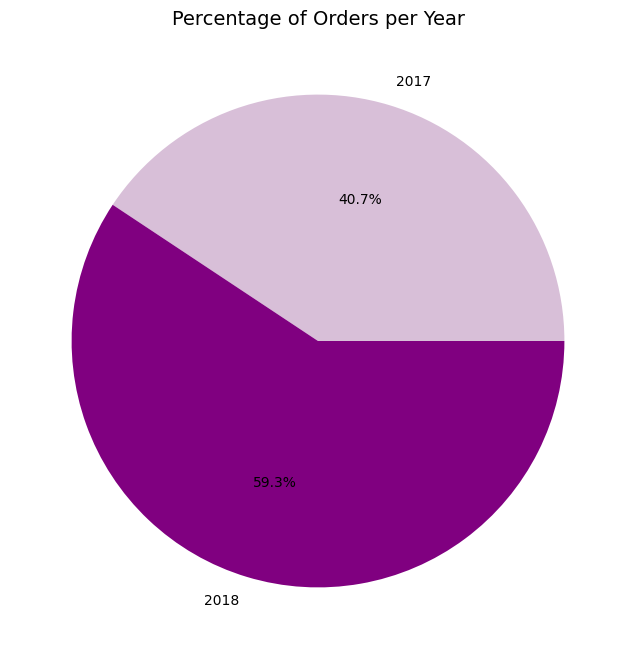

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'order_estimated_delivery_date' to datetime if not already
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], errors='coerce')

# Extract the year from the date column
order['Year'] = order['order_estimated_delivery_date'].dt.year

# Filter out any years not in 2017 or 2018 if necessary
order = order[order['Year'].isin([2017, 2018])]

# Count the number of orders for each year
yearly_sales = order['Year'].value_counts().sort_index()

# Define light and dark purple colors
colors = ['#D8BFD8', '#800080']  # Light purple and dark purple

# Plot the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', colors=colors)

# Add a title
plt.title('Percentage of Orders per Year', fontsize=14)

# Show the plot
plt.show()


In [31]:
# قراءة الملفات
order = pd.read_csv('/content/olist_orders_dataset.csv')          # ملف الطلبات
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')  # ملف العناصر
pro = pd.read_csv('/content/olist_products_dataset.csv')            # ملف المنتجات

# دمج order مع order_items بناءً على order_id
merged_orders_items = pd.merge(order, order_items, on='order_id', how='left')

# دمج النتيجة مع pro بناءً على product_id
merged_data = pd.merge(merged_orders_items, pro, on='product_id', how='left')

# تجميع البيانات
item_count = merged_data.groupby(['customer_id', 'order_purchase_timestamp', 'product_id'])['product_id'].count().reset_index(name='Count')

# عرض أول 10 صفوف
item_count.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,customer_id,order_purchase_timestamp,product_id,Count
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,64315bd8c0c47303179dd2e25b579d00,1
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,84183944dc7cddca87a5d384452c1d3c,1
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,9df2b21ec85378d71df4404712e17478,1
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,af3ec22cce878225aae6d9eb6c7a78eb,1
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,868b3136c5b206f91b8208fbfdf2cb7c,1
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,fa23bf270fb9880690b07d09b9f9ff20,1
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,daa7499d1e545811c843e8189cd30286,1
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,ba9f160a6ae1c23f25d690fd06fe4fd8,1
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,79ad39409fa4bcc36b4b7f734c79c2a2,1
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,c53feca3e876804031ed4a4b48ac8f1e,1


In [32]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import pandas as pd

# تحميل البيانات (تأكد من أن البيانات محملة بشكل صحيح)
items = pd.read_csv('/content/olist_order_items_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')

# تقليل حجم البيانات لاختبار الكود
items_sample = items.sample(n=1000, random_state=42)  # استخدام عينة صغيرة من البيانات
orders_sample = orders.sample(n=1000, random_state=42)  # استخدام عينة صغيرة من البيانات

# دمج بيانات الطلبات مع البيانات الأخرى للحصول على customer_id و product_id
merged_data = pd.merge(items_sample, orders_sample[['order_id', 'customer_id']], on='order_id', how='inner')

# تحقق من الأعمدة المتاحة
print("الأعمدة المتاحة في merged_data:")
print(merged_data.columns)

# الآن إنشاء item_count الذي يحتوي على عدد المنتجات التي اشتراها كل عميل
item_count = merged_data.groupby(['customer_id', 'product_id']).size().reset_index(name='count')

# تحويل البيانات إلى الشكل المناسب باستخدام pivot_table
try:
    item_count_pivot = item_count.pivot_table(
        index='customer_id',   # استخدام customer_id كمؤشر
        columns='product_id',  # استخدام product_id كأعمدة
        values='count',        # استخدام العدد كمحتوى
        fill_value=0           # ملء القيم الفارغة بـ 0
    )
    # عرض البيانات
    print("تم إنشاء الجدول المحوري بنجاح:")
    print(item_count_pivot)
except Exception as e:
    print(f"حدث خطأ أثناء إنشاء الجدول المحوري: {e}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


الأعمدة المتاحة في merged_data:
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id'],
      dtype='object')
تم إنشاء الجدول المحوري بنجاح:
product_id                        0f3288619c16188d156acc3ba91f36ab  \
customer_id                                                          
1004ffe8679b2e76e70417c5224b71ee                               1.0   
1a13719d21dafc59a8a17846e0172f0f                               0.0   
2351d4314775fcbef54ecdf9c93ad410                               0.0   
4ac279df237d79f58d8b70addc6e5d4d                               0.0   
55a0c3e86baf62169bf4ec368c02193f                               0.0   
5b31d1ba9e2b08086f398b79477962d7                               0.0   
6efbee10da96b631dcd2c0f3dcfccbd1                               0.0   
8c8ebb03344906d2201f54daafd859cf                               0.0   
b35a12036c527e0cc8e2310bc04c14a4                               0.0   
ba24dd2a35

In [34]:
import pandas as pd

# تحميل البيانات
items = pd.read_csv('/content/olist_order_items_dataset.csv')
pay = pd.read_csv('/content/olist_order_payments_dataset.csv')
pro = pd.read_csv('/content/olist_products_dataset.csv')
order = pd.read_csv('/content/olist_orders_dataset.csv')
#catname = pd.read_csv('/content/product_category_name_translation.csv')

# تقليل حجم البيانات إلى 1000 صف وحفظها بأسماء جديدة
items_sample_new = items.sample(n=1000, random_state=42)
pay_sample_new = pay.sample(n=1000, random_state=42)
pro_sample_new = pro.sample(n=1000, random_state=42)
order_sample_new = order.sample(n=1000, random_state=42)
#catname_sample_new = catname.sample(n=1000, random_state=42)

# حفظ العينات إلى ملفات جديدة
items_sample_new.to_csv('items_sample_new.csv', index=False)
pay_sample_new.to_csv('pay_sample_new.csv', index=False)
pro_sample_new.to_csv('pro_sample_new.csv', index=False)
order_sample_new.to_csv('order_sample_new.csv', index=False)
#catname_sample_new.to_csv('catname_sample_new.csv', index=False)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
items_sample_new.columns = items_sample_new.columns.str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
print("أعمدة ملف items_sample_new:")
print(items_sample_new.columns)

print("\nأعمدة ملف order_sample_new:")
print(order_sample_new.columns)

أعمدة ملف items_sample_new:
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

أعمدة ملف order_sample_new:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# تحميل البيانات من الملفات
items_sample_new = pd.read_csv('items_sample_new.csv')  # يحتوي على 'order_item_id' و 'product_id' و 'order_id'
order_sample_new = pd.read_csv('order_sample_new.csv')  # يحتوي على 'customer_id' و 'order_id'

# دمج البيانات باستخدام 'order_id' كمفتاح مشترك
merged_data = pd.merge(items_sample_new, order_sample_new, on='order_id', how='inner')

# حفظ البيانات المدمجة في ملف جديد
merged_data.to_csv('merged_data.csv', index=False)
print("تم حفظ الملف 'merged_data.csv' بنجاح.")

# الآن نستطيع العمل على البيانات المدمجة الجديدة
# نفترض أن البيانات تتضمن الأعمدة: 'customer_id', 'product_id', 'order_item_id'
item_count = merged_data[['customer_id', 'product_id', 'order_item_id']]

# تحويل البيانات إلى الشكل المناسب (Pivot Table)
item_count_pivot = item_count.pivot_table(
    index='customer_id',       # استخدام customer_id كمؤشر
    columns='product_id',      # استخدام product_id كأعمدة
    values='order_item_id',    # القيم المستخدمة هي order_item_id
    aggfunc='count'            # عد مرات وجود المنتجات
).fillna(0)                    # ملء القيم الفارغة بالصفر

# تحويل البيانات إلى ثنائية (1 إذا كان العميل قد اشترى المنتج، 0 إذا لم يشتريه)
basket = item_count_pivot.applymap(lambda x: 1 if x > 0 else 0)

# تطبيق FP-growth للعثور على الأنماط المتكررة
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)

# استخراج قواعد الارتباط من الأنماط المتكررة
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# عرض النتائج
print(frequent_itemsets.head())
print(rules.head())


تم حفظ الملف 'merged_data.csv' بنجاح.
    support                            itemsets
0  0.076923  (0f3288619c16188d156acc3ba91f36ab)
1  0.076923  (67d9cf5b0dc7a0b9fb091efc68b14140)
2  0.076923  (525947dbe3304ac32bf51602f9557c12)
3  0.076923  (67810bda0db346d0eee1ac3c6314af35)
4  0.076923  (30ac6df06dc59ad72cf2f158fc2d904c)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-90af1fd16a74>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = item_count_pivot.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [38]:
# إزالة الفواصل العشرية وتحويل البيانات إلى نوع 'int32'
item_count_pivot = item_count_pivot.astype('int32')

# عرض البيانات بعد التحويل للتأكد من النتيجة
print(item_count_pivot.head())

product_id                        0f3288619c16188d156acc3ba91f36ab  \
customer_id                                                          
1004ffe8679b2e76e70417c5224b71ee                                 1   
1a13719d21dafc59a8a17846e0172f0f                                 0   
2351d4314775fcbef54ecdf9c93ad410                                 0   
4ac279df237d79f58d8b70addc6e5d4d                                 0   
55a0c3e86baf62169bf4ec368c02193f                                 0   

product_id                        2948658cb6abc82847412be7201bfc4c  \
customer_id                                                          
1004ffe8679b2e76e70417c5224b71ee                                 0   
1a13719d21dafc59a8a17846e0172f0f                                 0   
2351d4314775fcbef54ecdf9c93ad410                                 0   
4ac279df237d79f58d8b70addc6e5d4d                                 0   
55a0c3e86baf62169bf4ec368c02193f                                 0   

product_id        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
from mlxtend.frequent_patterns import association_rules, apriori

# تحويل البيانات إلى شكل "السلة" (basket) باستخدام 'customer_id' كمعامل فريد
basket = item_count.groupby('customer_id')['product_id'].apply(list).reset_index()

# إنشاء مصفوفة ثنائية (one-hot encoding) من بيانات السلة
basket_encoded = basket['product_id'].str.join('|').str.get_dummies('|')

# تطبيق خوارزمية Apriori للعثور على الأنماط المتكررة
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# استخراج قواعد الارتباط من الأنماط المتكررة
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# عرض النتائج
print(frequent_itemsets.head())
print(rules.head())


    support                            itemsets
0  0.076923  (0f3288619c16188d156acc3ba91f36ab)
1  0.076923  (2948658cb6abc82847412be7201bfc4c)
2  0.076923  (30ac6df06dc59ad72cf2f158fc2d904c)
3  0.076923  (4ebab6a2135a2477b657bda38646b64b)
4  0.076923  (525947dbe3304ac32bf51602f9557c12)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
from mlxtend.frequent_patterns import association_rules, apriori

# تحويل البيانات إلى شكل "السلة" (basket) باستخدام 'customer_id' كمعامل فريد
basket = item_count.groupby('customer_id')['product_id'].apply(list).reset_index()

# إنشاء مصفوفة ثنائية (one-hot encoding) من بيانات السلة
basket_encoded = basket['product_id'].str.join('|').str.get_dummies('|')

# تطبيق خوارزمية Apriori للعثور على الأنماط المتكررة
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# فرز الأنماط المتكررة بناءً على قيمة الدعم (support) وعرض أعلى 10 أنماط
top_frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)

# عرض النتائج
print(top_frequent_itemsets)


    support                            itemsets
0  0.076923  (0f3288619c16188d156acc3ba91f36ab)
1  0.076923  (2948658cb6abc82847412be7201bfc4c)
2  0.076923  (30ac6df06dc59ad72cf2f158fc2d904c)
3  0.076923  (4ebab6a2135a2477b657bda38646b64b)
4  0.076923  (525947dbe3304ac32bf51602f9557c12)
5  0.076923  (67810bda0db346d0eee1ac3c6314af35)
6  0.076923  (67d9cf5b0dc7a0b9fb091efc68b14140)
7  0.076923  (7340a3839a1de1e99d149b8cf052a2ec)
8  0.076923  (85b2e22dc10456c8ce7b81f78ba8624b)
9  0.076923  (ddceb6eef6af67e9fbbd4c148dbe5fd9)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [41]:
from mlxtend.frequent_patterns import association_rules, apriori

# تحويل البيانات إلى شكل "السلة" (basket) باستخدام 'customer_id' كمعامل فريد
basket = item_count.groupby('customer_id')['product_id'].apply(list).reset_index()

# إنشاء مصفوفة ثنائية (one-hot encoding) من بيانات السلة
basket_encoded = basket['product_id'].str.join('|').str.get_dummies('|')

# تطبيق خوارزمية Apriori للعثور على الأنماط المتكررة مع تعديل قيمة الدعم
frequent_itemsets = apriori(basket_encoded, min_support=0.005, use_colnames=True)

# استخراج قواعد الارتباط باستخدام مقياس الرفع (lift)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# عرض النتائج مع الأعمدة المهمة
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)

# عرض القواعد العلوية
print(top_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [42]:
print(frequent_itemsets)

     support                            itemsets
0   0.076923  (0f3288619c16188d156acc3ba91f36ab)
1   0.076923  (2948658cb6abc82847412be7201bfc4c)
2   0.076923  (30ac6df06dc59ad72cf2f158fc2d904c)
3   0.076923  (4ebab6a2135a2477b657bda38646b64b)
4   0.076923  (525947dbe3304ac32bf51602f9557c12)
5   0.076923  (67810bda0db346d0eee1ac3c6314af35)
6   0.076923  (67d9cf5b0dc7a0b9fb091efc68b14140)
7   0.076923  (7340a3839a1de1e99d149b8cf052a2ec)
8   0.076923  (85b2e22dc10456c8ce7b81f78ba8624b)
9   0.076923  (ddceb6eef6af67e9fbbd4c148dbe5fd9)
10  0.076923  (f348ae21168771dfd5b8081e387b4f6b)
11  0.076923  (fa381a4a9af65ea5fc8f3829214045f9)
12  0.076923  (fb783e3e545937820b57fe539b2c5a6c)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
